In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
mode = 'jupyter' #colab
render = 'image' #image

In [3]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

if mode == 'colab':
    import cufflinks as cf
    cf.go_offline()
    init_notebook_mode(connected=False)

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Config for Colab
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
if render == 'image':
    import plotly.io as pio
    pio.renderers.default = 'png'

In [5]:
np.random.seed(123)

# Inferential Statistics

In statistics we usually either work with a population data or a sample data. However, getting a complete population data is difficult in real life scenario. Therefore, we collect a sample from the population and then work with sample data.

In statistics, we use data to analyze them and obtain meaningful inferences to help us in prediction or other tasks.

## Central Limit Theorem

In part 1, we discussed about normal and standard normal distribution. Normal distribution is a bell shaped curve with a mean and a variance.

When we apply transformation to a normal distribution we can obtain a new graph with a mean 0, variance 1, and the shape of the graph being same as that of the original graph. This kind of distribution is known as standard normal distribution.

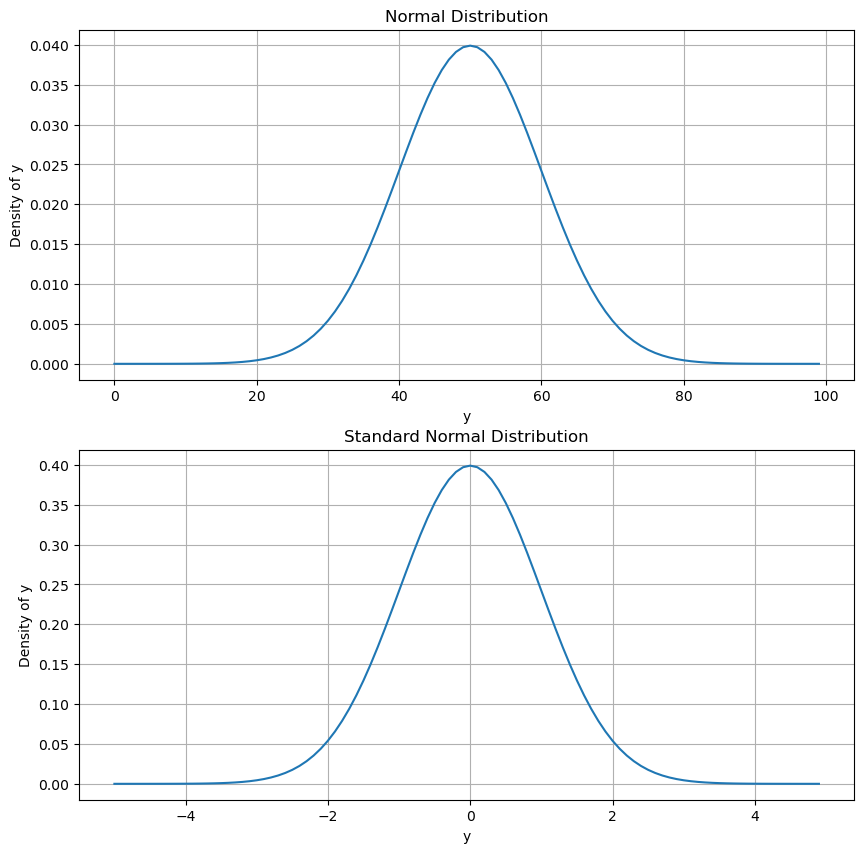

In [6]:
def convert_normal_to_standard_normal(outcomes, mean, standard_deviation):
  return (np.array(outcomes) - mean)/standard_deviation

samples = np.arange(100)
mean = 50
standard_deviation = 10
density = stats.norm.pdf(samples, mean, standard_deviation)

standard_normal_samples = convert_normal_to_standard_normal(samples, mean, standard_deviation)
standard_normal_densities = stats.norm.pdf(standard_normal_samples, 0, 1)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title("Normal Distribution")
plt.plot(samples, density)
plt.grid()
plt.xlabel("y")
plt.ylabel("Density of y")

plt.subplot(2, 1, 2)
plt.title("Standard Normal Distribution")
plt.plot(standard_normal_samples, standard_normal_densities)
plt.grid()
plt.xlabel("y")
plt.ylabel("Density of y")


plt.show()


**Central limit Theorem** states that if we collect multiple set of samples from a population data and calculate the mean for each set of sample - then all the sample means will be a normal distribution which is centered around the main population mean - regardless of shape of the distribution of the population data.

That is, if we have a population data with any shape e.g. poisson, chisquare, or even any unknow shape - we can take random samples from the population and calculate the mean. If we keep doing these over and over again we will get a collection of sample means. All those means will be normally distributed.

The population mean and variance is 498.66466137601986 and 122628.87562747614 respectively


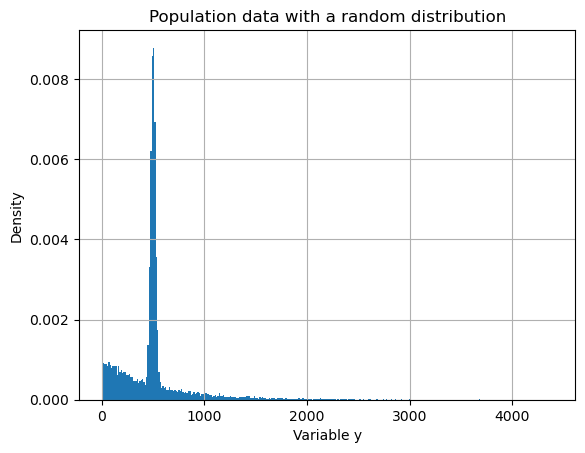

In [7]:
# Set the parameters for the gamma distribution
data_size = 10000
mean = 500
scale = 500
# Generate data with random distribution
population_data = np.concatenate([
    stats.poisson.rvs(mu=mean, size=data_size),
    stats.expon.rvs(scale=scale, size=data_size)
])

population_mean = np.mean(population_data)
population_variance = np.var(population_data)

print(f"The population mean and variance is {population_mean} and {population_variance} respectively")

plt.figure()
plt.title("Population data with a random distribution")
plt.hist(population_data, density=True, bins='auto')
plt.grid()
plt.xlabel("Variable y")
plt.ylabel("Density")
plt.show()

If we collect sample multiple times, compute the mean and plot the distribution of the mean we get the following

The variance of the sample mean is 3880.309419375598 and this multiplied by the sample size 30 equals 116409.28258126794


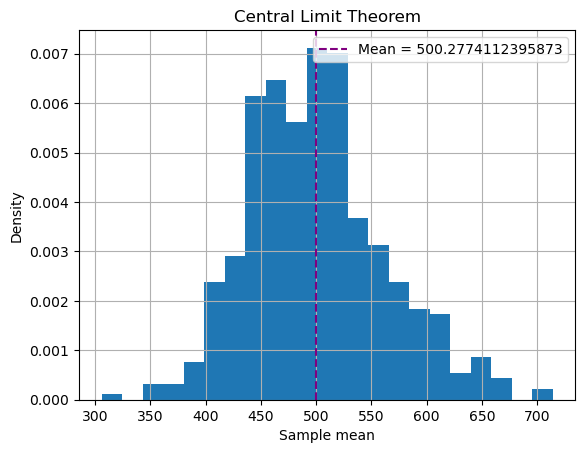

In [8]:
trials = 500
sample_size = 30

sample_means = []

for _ in range(trials):
  samples = np.random.choice(population_data, size=sample_size)
  sample_means.append(np.mean(samples))


mean_of_means = np.mean(sample_means)
variance_of_means = np.var(sample_means)

print(f"The variance of the sample mean is {variance_of_means} and this multiplied by the sample size {sample_size} equals {variance_of_means*sample_size}")

plt.figure()
plt.title("Central Limit Theorem")
plt.hist(sample_means, bins='auto', density=True)
plt.axvline(x = mean_of_means, linestyle='--', color='purple', label = f'Mean = {mean_of_means}')
plt.grid()
plt.xlabel("Sample mean")
plt.ylabel("Density")
plt.legend()
plt.show()


We can see from the above graph that even if we collect just 30 samples each time and calculate the mean of those sample, as the number of trials increase our distribution of those means become a normal distribution. The mean of those sample means is very close to the population mean.

In this way we can approximate a population mean even we do not have the entire population data or the population mean.

The variance of this distribution will be

\begin{equation}
s^2_{means} = \frac{\sigma^2}{n}
\end{equation}

Here,
- $\sigma^2$ is the population variance

- 'n' is the sample size

- $s^2_{means}$ is the variance of the distribution of means

We can see from the above graphs that if we multiply the variance of the normal distribution by the sample size we get an approximate value of the population variance.

**In order for Central limit theorem to apply, we need a sample size of atleast 30**.

We know that a normal distribution has an elegant statistics, and a lot of features to perform data anlaysis. Central limit theorem allows us to take a data that is not normally distributed and create a normal distribution out of it so that we can apply the statistics of normal distribution for analysis and inference.

### Standard Error

After applying a central limit theorem and creating a normal distribution - if we compute the standard deviation of that distribution, then that deviation is known as **standard error**.

It shows us the variability of the means of the different samples that we extracted. It also tells us how well we approximated the true (population) mean.

The equation for standard error is as follows:

\begin{equation}
s_{means} = \sqrt{s^2_{means}} = \sqrt{ \frac{\sigma^2}{n} }
\end{equation}


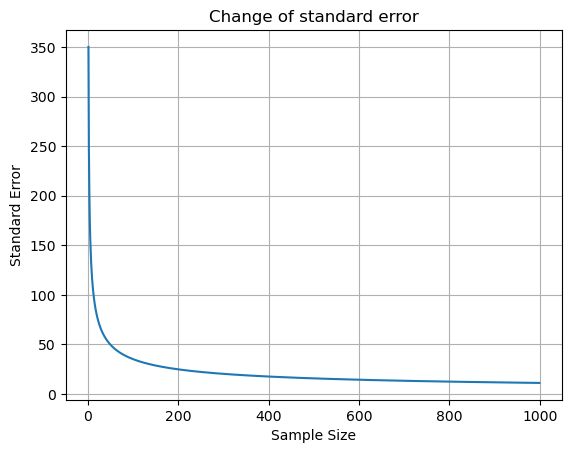

In [9]:
def calculate_standard_error(population_variance, sample_size):
  return np.sqrt(population_variance/sample_size)

sample_size = np.arange(1, 1000)

plt.figure()
plt.title("Change of standard error")
plt.plot(sample_size, calculate_standard_error(population_variance, sample_size))

plt.grid()
plt.xlabel("Sample Size")
plt.ylabel("Standard Error")
plt.show()

From the aove graph we can see that, as the sample size increases the standard error decreases. It makes sense because if we collect a larger sample from a population we will be able to better approximate the true mean

## Estimators and Estimates

An estimator is an approximation of a value that depends solely on sample information. In the above example, we collected samples from the population data and calculated a sample mean. This sample mean is an estimate of the population mean. Similarly, the sample variance is an estimate of the population variance.

Estimates are of two types:

- Point Estimates
- Confidence Interval Estimates


### Point Estimate
A point estimate provides an exact estimate of the population parameter. In our case, sample mean was a point estimate as it provided a single estimate value.

### Confidence Interval Estimate
A confidence interval estimate provides us an interval or a range of values as an approximation of the population parameter. As for example, after multiple trials we got many sample means. Suppose the value of all the means range from 400-600. We can say that 400-600 is a condidence interval estimate of the actual population mean.

**A point estimate is the value in the middle of a confidence interval estimate**.

Even though point estimate provides us a single value of the approximation, there is a high probability of it being incorrect since it is just estimating the true value. However, if we have a range of value then there is a high probability that the true value will lie somewhere within the range.

However, as the range of interval decreases, the percentage of confidence also decreases. Because if we estimate that the true mean is between 400-410, there is a lower chance of this being true than saying that the mean is between 400-500.

**There may be multiple estimators for the same variable. An estimator is a function that estimates the value of something. All estimators have two properties:**

- Bias
- Efficiency

**Bias**

It is a property of an estimator and indicates how much an estimator is biased towards the sample. An estimator that has a low bias, has a higher chance of estmating the true value. So, an estimator with low bias has an expected value closer to the population parameter.

**Effiency**

The most efficent estimator has the least variability in the outcome.


## Confidence Interval

A confidence interval estimate provides us an interval or a range of values as an approximation of the population parameter. As for example, after multiple trials we got many sample means. Suppose the value of all the means range from 400-600. We can say that 400-600 is a condidence interval estimate of the actual population mean.

A confidence interval with a range (400, 500) and a confidence 95\% means that we are 95\% sure that the true value lies within 400 to 500. This 'confidence' is known as **confidence level**.

It is never possible to have a confidence of 100\% unless the population data is already known.

The equation for confidence level is as follows:

\begin{equation}
ConfidenceLevel = 1 - \alpha, 0 \leq \alpha \leq 1
\end{equation}

Here,
- Alpha is the probability that the true value is **not** within the confidence interval.

The equation to calculate a confidence interval is as follows:

\begin{equation}
Interval = [E - R * s, \quad E + R * s] \\
Interval = [\bar{x} - Z_{\alpha/2} * s, \bar{x} + Z_{\alpha/2} * s ]
\end{equation}

Here,
- 'E' is the point estimate for the population paramter. For a normal distribution of sample means, the point estimate 'E' is the mean of the distribution i.e. $\bar{x}$

- 'R' is the reliability factor. For a normal distribution of sample means, the reliability factor is calculated from the **z score table** of standard normal distribution. But this means we need to first convert the normal distribution to a standard normal distribution.

- 's' is the standard error. For a normal distribution of sample means, the standard error 's' is the square root of the variance i.e. $\sqrt{\frac{\sigma^2_{population}}{n}}$ where $\sigma^2$ is the population mean.


In [10]:
def get_z_critical_value(alpha):
    return stats.norm.ppf(1 - (alpha/2))

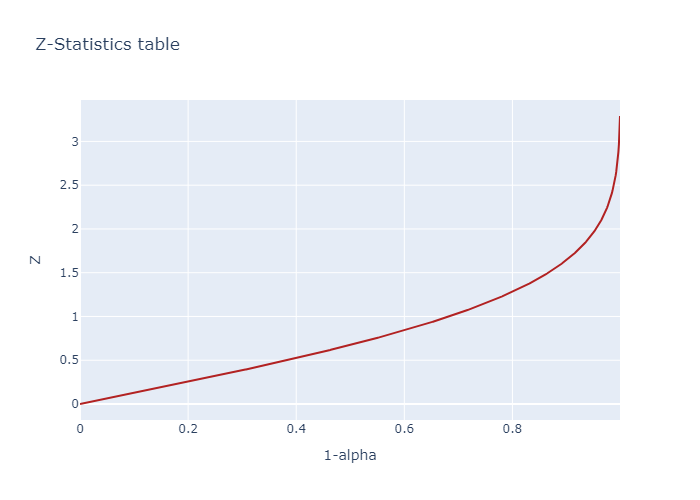

In [11]:
confidences = np.arange(0, 1, 0.001)
alphas =1 - confidences
score = get_z_critical_value(alphas)

if mode == 'colab':
    configure_plotly_browser_state()
    
fig = go.Figure()

fig.add_trace(go.Scatter(x=confidences, y=score, name='Confidences', mode='lines', marker_color='firebrick'))

fig.update_layout(title='Z-Statistics table',
                  xaxis=dict(title='1-alpha'),
                  yaxis=dict(title='Z'))

# Show the chart
fig.show()



### Calculating Confidence Interval when the population variance is known

To calculate confidence interval, we need to know three values:

- Point Estimate or the sample mean from the normal distribution of means.
- Reliability Factor
- Population variance

1. Point Estimate

When calculating the confidence interval to estimate some parameter of a population data we collect a large sample, calculate the sample means from those samples and create a normal distribution of the sample means. Since the mean of the normal distribution approximates the true mean, we can use the sample mean $\bar{x}$ as the point estimate.

2. Population variance

There are two methods to calculating the confidence interval - one where we know the population variance and one where we don't know the population variance. For this example, we will assume that we know the population variance which is $\sigma^2$.

3. Reliability Factor

The reliability factor is denoted by $Z_{\alpha/2}$. Here, $\alpha$ is the complement of confidence level i.e. if we want a confidence level of $95\%$ we should set $\alpha$ equal to $0.05$.

Let for a normal distribution of sample means,
- Mean $\bar{x}$ = 100,200
- Population Standard Deviation $\sigma$ = 15,000
- Sample Size, n = 30
- Standard Error, s = $\sqrt{\frac{\sigma^2}{n}}$ =  $\sqrt{\frac{15,000^2}{30}} = 2,739$


If we want a confidence level of 0.95 then $\alpha$ will be 0.05.

We can use these information to read the Z-score table and find the value of $Z_{\alpha/2}$.

**We can find the z-score table [here](https://byjus.com/maths/z-score-table/)**

The z-score table contains the value of ($1 - \frac{\alpha}{2}$) in each of the cell. For our case, the value is $1 - \frac{0.05}{2} = 0.975$. We will find the cell with the nearest value to this and get the corresponding number in the row and the column. The value for this in the z-score table is 1.9 and 0.06. So, the reliability factor (also known as critical value), $Z_{\alpha/2} = 1.9 + 0.06 = 1.96$. So, our confidence interval wil be:

\begin{equation}
Interval = [E - R * s, \quad E + R * s] \\
Interval = [\bar{x} - 1.96 * 2,739, \bar{x} + 1.96 * 2,739] \\
Interval = [100,200 - 1.96 * 2,739, 100,200 + 1.96 * 2,739] \\
Interval = [94,833, 105,568]
\end{equation}

In [12]:
def calculate_z_confidence_interval(sample_mean, sample_size, population_variance, confidence=0.95):
    alpha = 1 - confidence
    reliability_factor = get_z_critical_value(alpha)
    margin_of_error = np.sqrt(population_variance/sample_size)
    
    return (sample_mean - reliability_factor * margin_of_error, mean + reliability_factor * margin_of_error)

mean = 100_200
population_standard_deviation = 15_000
sample_size = 30
confidence = 0.95

confidence_interval = calculate_z_confidence_interval(mean, sample_size, np.square(population_standard_deviation), confidence)
print(f"The population mean will be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

# Using package
confidence_interval = stats.norm.interval(confidence=confidence, loc=mean, scale=np.sqrt(np.square(population_standard_deviation)/sample_size))
print(f"The population mean will be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

The population mean will be between 94832.42 and 105567.58
The population mean will be between 94832.42 and 105567.58


### Calculating Confidence Interval when the population variance is unknown

When we have a small sample (sample size usually less than 50), we use the 'T-Score' table instead of the 'Z-score' table and assume that the distribution is a **Students' T** distribution instead of a **normal** distribution.

Since the T distribution has fatter tails, it can account for the outliers in a small sample dataset.

**Furthermore, we can use the T distribution table when we do not have the population variance** - which is usually the case since collection all data of a population is not always possible in real life scenario.

The equation to calculate the confidence interval of a T distribution, with an unknown population variance is as follows:

\begin{equation}
Interval = [\bar{x} - t_{n-1,\alpha/2} * \frac{s}{\sqrt{n}}, \quad \bar{x} + t_{n-1,\alpha/2} * \frac{s}{\sqrt{n}}]
\end{equation}

Here,
- 's' is the standard error (standard deviation) of the distribution of sample mean.

- '$\bar{x}$' is the mean of the distribution.

- 'n' is the sample size.

- $t_{n-1,\alpha/2}$ is the score collected from the 'T statistics' table.

- $\alpha$ is the complement of confidence level that we want.

- $(n-1)$ is the degrees of freedom. For sample size 'n' the degrees of freedom is n-1.


For a T statistic table, the row indicates the degrees of freedom i.e. n-1. Since we know 'n', we go to the corresponding row and find the cell which has the value in the column containing our confidence interval. The value of that cell is the the value of $t_{n-1,\alpha/2}$.

We use these values now to compute the confidence interval for the true mean.

**We can find the T-Score table [here](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)**

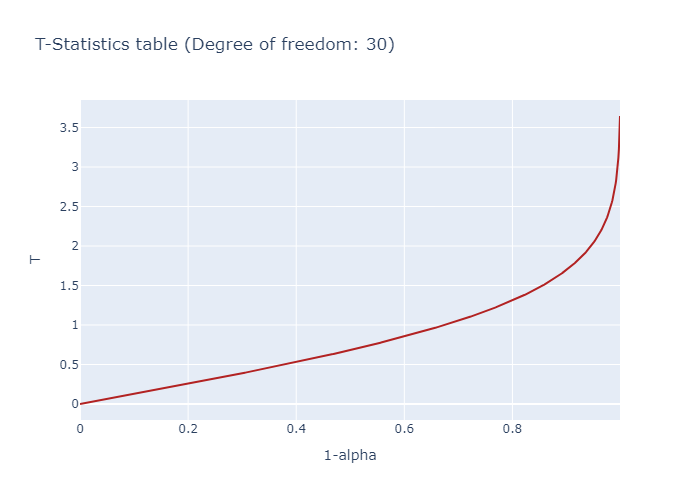

In [13]:
def get_t_critical_value(alpha, degree_of_freedom):
    return stats.t.ppf(1-alpha/2, degree_of_freedom)

confidences = np.arange(0, 1, 0.001)
alphas =1 - confidences
degree_of_freedom = 30

score = get_t_critical_value(alphas, degree_of_freedom)

if mode == 'colab':
    configure_plotly_browser_state()
    
fig = go.Figure()

fig.add_trace(go.Scatter(x=confidences, y=score, name='Confidences', mode='lines', marker_color='firebrick'))

fig.update_layout(title='T-Statistics table (Degree of freedom: 30)',
                  xaxis=dict(title='1-alpha'),
                  yaxis=dict(title='T'))

# Show the chart
fig.show()


In [14]:
def calculate_t_confidence_interval(sample_mean, sample_size, sample_standard_deviation, confidence=0.95):
    alpha = 1 - confidence
    degree_of_freedom = sample_size - 1
    if degree_of_freedom <= 0:
        degree_of_freedom = 1
    reliability_factor = get_t_critical_value(alpha, degree_of_freedom)
    
    margin_of_error = sample_standard_deviation/np.sqrt(sample_size)
    return (sample_mean - reliability_factor * margin_of_error, sample_mean + reliability_factor * margin_of_error)

sample_mean = 100_200
sample_variance = 15_000
sample_size = 30
confidence = 0.95

confidence_interval = calculate_t_confidence_interval(sample_mean, sample_size, np.sqrt(sample_variance), confidence)
print(f"The population mean will be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

# Using package
confidence_interval = stats.t.interval(confidence, sample_size-1, loc=sample_mean, scale=np.sqrt(sample_variance)/np.sqrt(sample_size))
print(f"The population mean will be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

The population mean will be between 100154.27 and 100245.73
The population mean will be between 100154.27 and 100245.73


## Margin of Error

The expression $Z_{\alpha/2}*\frac{\sigma^2}{n}$ when the population variance is known and the expression $t_{n-1,\alpha/2}*\frac{s}{\sqrt{n}}$ when the population is unknown, is known as the **margin of error**.

If the margin of error is small, the confidence interval will be narrower.

## Confidence Interval - Comparing two different Variables

Until now we have used confidence interval to approximate the true population mean of a normally distributed variable. We have used Z-statistics when the population variance is known and the sample size is over 50. On the other hand, we have used T-statistics when the population variance is unknown or the sample size is less than 50.

What if we want to compare two different type of variables e.g. whether the price of apples in New york is more expensive than that of L.A.

In this case we need to collect sample from the two different populations and calculate the condidence interval of the difference between their approximate population mean prices.

When comparing two different populations, the samples from these two populations can be of two types:

1. **Dependent Samples:** When one sample affects another or is dependent on another, then those samples are known as dependent samples. For example, suppose we created a new medicine that increases the concentration of magensium in blood. We want to test if it actually increases it. So, we collect blood from samples of patient. Then we provide them the medicine. We then take a second sample of blood from the same patients to check if the concentration of magnesium did increase. In this case, these two samples are dependent.

The following properties can cause two samples to be dependent:

- Before and after situation (like the blood sample example)
- Cause and Effect (when one variable is caused by another)

2. **Independent Samples:** When one sample does not affect the other, then the samples are called independent samples. For example, we collect the marks of students from two different departments of a university - engineering and management. We want to test what is the difference between the mean marks of the students of engineering and that of management. In this case, the marks of one department has nothing to do with another. So, these type of samples are known as independent samples.

When calculating the confidence interval of two independent samples, one of the following scenario should be considered:

- Population variance of both the samples are known
- Population variance of both samples are unknown but assumed to be equal.
- Population variance of both samples are unknown and assumed to be different.

## Confidence interval of two dependent variables

Let us consider the example provided above related to the blood sample. Suppose we created a new medicine that increases the concentration of magensium in blood. We want to test if it actually increases it. So, we collect blood from samples of patient. Then we provide them the medicine. We then take a second sample of blood from the same patients to check if the concentration of magnesium did increase.

**We assume that both the variables are normally distributed.**

The following table contains the concentration of magnesium of patients before and after taking the medicine:

| Patient No | Before (x) | After (y) | Difference |
| --- | --- | --- | --- |
| 1 | 2.00 | 1.70 | -0.30 |
| 2 | 1.40 | 1.70 | 0.30 |
| 3 | 1.30 | 1.80 | 0.50 |
| 4 | 1.10 | 1.30 | 0.20 |
| 5 | 1.80 | 1.70 | -0.10 |
| 6 | 1.50 | 1.60 | 0.10 |
| 7 | 1.60 | 1.50 | -0.10 |
| 8 | 0.70 | 1.70 | 1.00 |
| 9 | 0.90 | 1.70 | 0.80 |
| 10 | 1.50 | 2.40 | 0.90 |

Here, we contain 10 data for each sample. We need to perform the following steps to compute the confidence interval:

1. Calculate the difference between each data of two samples. We have to find the difference between those two data points that affect one another. In this case we calculate the difference of magnesium level of the same patient.

2. We calculate the sample means '$\bar{d}$' for the difference between both samples where it is equal to the mean of the difference between both samples.

3. We caclculate the standard deviation '$s_{x-y}$' of the difference between both the samples.

4. Since we have a very small sample size and the population variance is unknown, we need to use the T-statistics to compute the confidence interval.

5. We use the following equation to calculate the confidence interval:

\begin{equation}
Interval = [\bar{d} - t_{n-1,\alpha/2} * \frac{s_{x-y}}{\sqrt{n}}, \quad \bar{d} + t_{n-1,\alpha/2} * \frac{s_{x-y}}{\sqrt{n}}]
\end{equation}

Here,
- Mean, $\bar{d} = \frac{1}{n} \sum_{i=0}^n (x_i - y_i)$
- Standard Deviation, $s_{x-y} = \sqrt{s^2_{x-y}}$ where $\sqrt{s^2_{x-y}}$ is the variance of the difference.
- 'n' is the sample size for both samples since they have equal length.
- $\alpha$ is the complement of confidence level.

When we solve the equation using the mean, standard deviation, degree of freedom, T statistics, and a confidence level of $95\%$ we see that the confidence interval is \[0.02, 0.64\]. Since the value is positive we can $95\%$ confident that the mean amount of magnesium is greater after taking the medicine and therefore, the level of magnesium does increase due to the medicine.

In [15]:
magnesium_before_medication = np.array([2.0, 1.4, 1.3, 1.1, 1.8, 1.5, 1.6, 0.7, 0.9, 1.5])
magnesium_after_medication = np.array([1.7, 1.7, 1.8, 1.3, 1.7, 1.6, 1.5, 1.7, 1.7, 2.4])
diff = magnesium_after_medication - magnesium_before_medication
mean = np.mean(diff)
standard_deviation = np.std(diff)
sample_size = diff.size 
confidence = 0.95

confidence_interval = calculate_t_confidence_interval(mean, sample_size, standard_deviation, confidence)

print(f"The increase in magnesium is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

The increase in magnesium is between 0.02 and 0.64


## Confidence interval of two independent variables - Population variance is known


When we want to compare two independent normally distributed variables whose population variance is known, we can use the following equaution:

\begin{equation}
Interval = [(\bar{x} - \bar{y}) - Z_{\alpha/2} * \sqrt{ \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}}, \quad (\bar{x} - \bar{y}) + Z_{\alpha/2} * \sqrt{ \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}}]
\end{equation}

Here,
- $\bar{x}$ and $\bar{y}$ are the sample mean of the population 'x' and 'y' respectively.

- $\sigma^2_x$ and $\sigma^2_y$ are the population variance of the sample 'x' and 'y' respectively.

- $n_x$ and $n_y$ are the sample size of the samples 'x' and 'y' respectively.

- $\alpha$ is the complement of the confidence interval.

- 'Z' is the score from the Z-statistics table.


**Difference between poulation variance**
The equation to calculate the difference between the variance of the two population is as follows:

\begin{equation}
\sigma^2_{x-y} = \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}
\end{equation}

Here, we calculate the difference of the variance of the two populations. Since the population may have different number of samples, we divide each variance by its corresponding sample size. Furthermore, we add both the values when calculating the difference because '**dispersion is additive**' - more variables mean higher or equal dispersion and variability.


**Example**
For example, we have collected samples of grade from engineering and management department and computed their individual means.

| - | Engineering (x) | Management (y) | Difference |
| --- | --- | --- | --- |
| Sample mean | 58 | 65 | -7 |
| Sample size | 100 | 70 | - |
| Population Standard Deviation | 10 | 5 | 1.16 |

Here, the value '1.16' of the difference between the variance is calculated using the formula above.

When we use these values and solve the equation of confidence interval we see that the confidence interval is \[-9.28, -4.72\]. Since the values are negative we can be $05\%$ sure (as we used a confidence level of 95\%) that the students of engineering score lower marks than that of management.

In [16]:
def calculate_confidence_interval_independent_variables_known_population_variance(sample_mean_1, sample_mean_2, sample_size_1, sample_size_2, 
                                                                                population_variance_1, population_variance_2, confidence=0.95):
    mean = sample_mean_1 - sample_mean_2
    margin_of_error = np.sqrt( (population_variance_1/sample_size_1) +  (population_variance_2/sample_size_2))
    alpha = 1 - confidence
    critical_value = get_z_critical_value(alpha)
    
    return ( mean - critical_value * margin_of_error, mean + critical_value * margin_of_error )

sample_mean_a = 58
sample_mean_b = 65
sample_size_a = 100
sample_size_b = 70
population_variance_a = np.square(10)
population_variance_b = np.square(5)
confidence = 0.95

confidence_interval = calculate_confidence_interval_independent_variables_known_population_variance(
    sample_mean_a, sample_mean_b, sample_size_a, sample_size_b, population_variance_a, population_variance_b, confidence
)

print(f"The confidence interval is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

The confidence interval is between -9.28 and -4.72


## Confidence interval of two independent variables - Population variance is unknown and assumed to be same

When we do not have the population variance of two normally distributed variables but assume that the variance will be equal, and if we want to compare the difference between the mean of these two variables we use the following equation:

\begin{equation}
Interval = [(\bar{x} - \bar{y}) - t_{n_x + n_y - 2,\alpha/2} * \sqrt{ \frac{\sigma^2_p}{n_x} + \frac{\sigma^2_p}{n_y}}, \quad (\bar{x} - \bar{y}) + t_{n_x + n_y - 2, \alpha/2} * \sqrt{ \frac{\sigma^2_p}{n_x} + \frac{\sigma^2_p}{n_y}}]
\end{equation}

Here,
- $n_x$ and $n_y$ are the sample size of 'x' and 'y' respectively.
- $\bar{x}$ and $\bar{y}$ are the sample mean of 'x' and 'y' respectively.
- $\sigma^2_p$ is the pooled variance
- $\alpha$ is the complement of the confidence interval

Since we are assuming that the population variance is equal for both the variables, we can use the following equation to calculate a single variance for both of them - it is known as the **pooled variance**. The equation to calculate a pooled variance is as follows:

\begin{equation}
s^2_p = \frac{(n_x - 1) s_x^2 + (n_y - 1) s_y^2}{n_x + n_y - 2}
\end{equation}

Here,
- $n_x$ and $n_y$ are the sample size of 'x' and 'y' respectively.
- $s^2_x$ and $s^2_y$ is the variance of the sample 'x' and 'y' respectively.


To locate the score in T-statistics we use the degree of freedom $n_x + n_y -2$ instead of just $n-1$ since the sample size of both the populations are different.

## Confidence interval of two independent variables - Population variance is unknown and assumed to be different

When we do not have the population variance of two normally distributed variables but assume that the variance will be **not** equal, and if we want to compare the difference between the mean of these two variables we use the following equation:

\begin{equation}
Interval = [(\bar{x} - \bar{y}) - t_{\nu,\alpha/2} * \sqrt{ \frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}, \quad (\bar{x} - \bar{y}) + t_{\nu, \alpha/2} * \sqrt{ \frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}]
\end{equation}

Here,
- $n_x$ and $n_y$ are the sample size of 'x' and 'y' respectively.
- $\bar{x}$ and $\bar{y}$ are the sample mean of 'x' and 'y' respectively.
- $\sigma^2_x$ and $\sigma^2_y$ are the sample variance of 'x' and 'y' respectively.
- $\alpha$ is the complement of the confidence interval
- $\nu$ is the degrees of freedom for the T-statistics.


To calculate the degrees of freedom ($\nu$), we can use the following equation:

\begin{equation}
\nu = \frac{ ( \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y} )^2 }{ (\frac{s_x^2}{n_x})^2 / (n_x - 1) + (\frac{s_y^2}{n_y})^2 / (n_y - 1) }
\end{equation}

Here,
- $n_x$ and $n_y$ are the sample size of 'x' and 'y' respectively.
- $\sigma^2_x$ and $\sigma^2_y$ are the sample variance of 'x' and 'y' respectively.

In [17]:
def calculate_pooled_variance(sample_size_1, sample_size_2, sample_variance_1, sample_variance_2):
    num_1 = (sample_size_1 - 1) * sample_variance_1
    num_2 = (sample_size_2 - 1) * sample_variance_2
    den = sample_size_1 + sample_size_2 - 2
    
    return (num_1 + num_2)/den

def calculate_degree_of_freedom_dependent_variables(sample_size_1, sample_size_2, sample_variance_1, sample_variance_2):
    num_1 = sample_variance_1/sample_size_1
    num_2 = sample_variance_2/sample_size_2
    
    
    den_1 = np.power(sample_variance_1/sample_size_1, 2) / (sample_size_1 - 1)
    den_2 = np.power(sample_variance_2/sample_size_2, 2) / (sample_size_2 - 1)
    
    return np.square(num_1 + num_2)/(den_1 + den_2)

def calculate_confidence_interval_independent_variables_unknown_population_variance(
    sample_mean_1, sample_mean_2, sample_size_1, sample_size_2, sample_variance_1, sample_variance_2, confidence=0.95,
    same_population_variance=False
):
    if same_population_variance:
        pooled_variance = calculate_pooled_variance(sample_size_1, sample_size_2, sample_variance_1, sample_variance_2)
        margin_of_error = np.sqrt( (pooled_variance/sample_size_1) + (pooled_variance/sample_size_2) )
        degree_of_freedom = sample_size_1 + sample_size_2 - 2
    else:
        margin_of_error = np.sqrt( (sample_variance_1/sample_size_1) + (sample_variance_2/sample_size_2) )
        degree_of_freedom = calculate_degree_of_freedom_dependent_variables(sample_size_1, sample_size_2, sample_variance_1, sample_variance_2)
        
        
    mean = sample_mean_1 - sample_mean_2
    alpha = 1 - confidence
    
    critical_value = get_t_critical_value(alpha, degree_of_freedom)
    
    return (mean - critical_value * margin_of_error, mean + critical_value * margin_of_error)
        
    

sample_mean_a = 3.94
sample_mean_b = 3.25
sample_size_a = 10
sample_size_b = 8
sample_variance_a = np.square(0.18)
sample_variance_b = np.square(0.27)
confidence = 0.95

confidence_interval = calculate_confidence_interval_independent_variables_unknown_population_variance(
    sample_mean_a, sample_mean_b, sample_size_a, sample_size_b, sample_variance_a, sample_variance_b, confidence, False
)

print(f"The confidence interval is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")   


confidence_interval = calculate_confidence_interval_independent_variables_unknown_population_variance(
    sample_mean_a, sample_mean_b, sample_size_a, sample_size_b, sample_variance_a, sample_variance_b, confidence, True
)

print(f"The confidence interval is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")   

The confidence interval is between 0.45 and 0.93
The confidence interval is between 0.46 and 0.92


**References:**

1. [The Data Science Course: Complete Data Science Bootcamp](https://www.udemy.com/share/101W9c3@oEFxH6jfeF78cKv-RDiIPVbI_iJt7crj25dGEjsiIRt9MbSV8n50dmB7AlanMAikNg==/)

2. [Z-Table](https://byjus.com/maths/z-score-table/)

3. [T-Table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)